# 여러가지 순환신경망 학습 - IMDB 데이터 🎬 

## RNN(Recurrent Neural Network)
- Simple RNN 
  - input : (batch_size, timesteps, input_dim)
     - timesteps : 1개의 샘플에 포함된 정보의 개수
  - output : (batch_size, units)

In [7]:
from tensorflow.keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 500
batch_size = 32

In [8]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print(len(x_train), 'train_sequences')
print(len(x_test), 'test_sequences')

print('Pad sequences (samples x time)')
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)
print('input_train shape:', x_train.shape)
print('input_test shape:', x_test.shape)

Loading data...
25000 train_sequences
25000 test_sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


- 네트워크의 표현력을 증가시키기 위해 <u>여러개의 순환층을 차례대로 쌓는 것이 유용할 수도 있음</u>
  - 이런 설정에서는 중간층들이 **전체 출력 시퀀스를 반환** 하도록 설정 (**return_sequences= True**)

In [3]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [4]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 75s 462ms/step - loss: 0.6761 - acc: 0.5561 - val_loss: 0.5859 - val_acc: 0.6892
Epoch 2/10
157/157 [==============================] - 78s 497ms/step - loss: 0.4174 - acc: 0.8134 - val_loss: 0.3756 - val_acc: 0.8346
Epoch 3/10
157/157 [==============================] - 73s 465ms/step - loss: 0.2797 - acc: 0.8892 - val_loss: 0.3461 - val_acc: 0.8592
Epoch 4/10
157/157 [==============================] - 72s 459ms/step - loss: 0.1808 - acc: 0.9322 - val_loss: 0.5941 - val_acc: 0.7356
Epoch 5/10
157/157 [==============================] - 70s 448ms/step - loss: 0.0992 - acc: 0.9654 - val_loss: 0.5579 - val_acc: 0.8426
Epoch 6/10
157/157 [==============================] - 71s 450ms/step - loss: 0.0465 - acc: 0.9848 - val_loss: 0.6335 - val_acc: 0.8410
Epoch 7/10
157/157 [==============================] - 70s 447ms/step - loss: 0.0201 - acc: 0.9938 - val_loss: 0.8629 - val_acc: 0.8042
Epoch 8/10
157/157 [==============================] - 7

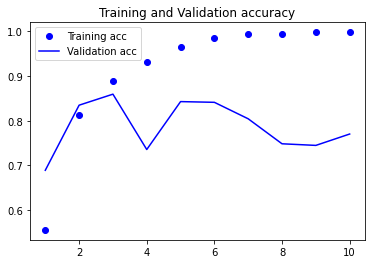

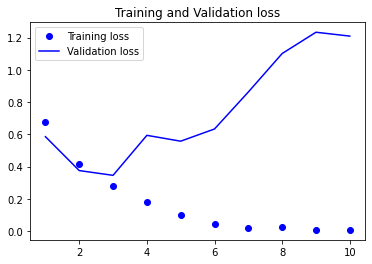

<Figure size 432x288 with 0 Axes>

In [5]:
# 정확성 확인 
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss =history.history['val_loss']

epochs = range(1, len(acc)+1)

# accuracy 그래프 
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

# loss 그래프 
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.figure()
plt.show()

In [6]:
# 데이터 테스트(검증)
model.evaluate(x_test, y_test)

782/782 [==============================] - 61s 78ms/step - loss: 1.2662 - acc: 0.7624


[1.2662094831466675, 0.762440025806427]

- 정확성: 76%
  - Embedding층을 사용하여 구성한 모델 보다 낮음, 성능이 높지 않음 
  - Simple RNN은 영화 리뷰와 같이 긴 문장의 데이터를 처리하기에는 적합하지 않음 
  - 문제점 ❗️
    - **Vanishing gradient problem**: 앞 부분을 시점이 흐를 수록 지속해서 기억하지 못함, 오래된 값은 영향력이 줄어든다 

## LTSM (Long Short-Term Memory)
- RNN의 그래디언트 소실 문제에 대한 대응방안 
- 'Cell state'를 통해 이전 정보를 계속해서 사용하여 그래디언트 손실 문제를 방지하는 것

In [ ]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 57s 350ms/step - loss: 0.5003 - acc: 0.7703 - val_loss: 0.4493 - val_acc: 0.8312
Epoch 2/10
157/157 [==============================] - 56s 354ms/step - loss: 0.2864 - acc: 0.8887 - val_loss: 0.3002 - val_acc: 0.8752
Epoch 3/10
157/157 [==============================] - 55s 351ms/step - loss: 0.2291 - acc: 0.9136 - val_loss: 0.3194 - val_acc: 0.8632
Epoch 4/10
157/157 [==============================] - 56s 356ms/step - loss: 0.1976 - acc: 0.9264 - val_loss: 0.4325 - val_acc: 0.8388
Epoch 5/10
157/157 [==============================] - 56s 356ms/step - loss: 0.1728 - acc: 0.9374 - val_loss: 0.2860 - val_acc: 0.8872
Epoch 6/10
157/157 [==============================] - 56s 355ms/step - loss: 0.1531 - acc: 0.9449 - val_loss: 0.3169 - val_acc: 0.8802
Epoch 7/10
157/157 [==============================] - 56s 357ms/step - loss: 0.1407 - acc: 0.9500 - val_loss: 0.4716 - val_acc: 0.8540
Epoch 8/10
157/157 [==============================] - 5

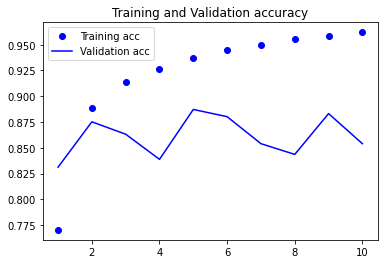

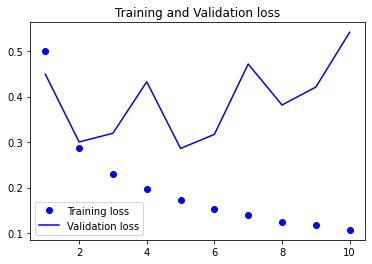

<Figure size 432x288 with 0 Axes>

In [ ]:
# 정확성 확인 
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss =history.history['val_loss']

epochs = range(1, len(acc)+1)

# accuracy 그래프 
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

# loss 그래프 
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.figure()
plt.show()

In [ ]:
# 모델 평가하기
model.evaluate(x_test, y_test)

782/782 [==============================] - 32s 41ms/step - loss: 0.6665 - acc: 0.8244


[0.666522741317749, 0.824400007724762]

- 정확성: 82%
  - RNN 보다 정확성이 높아짐을 확인할 수 있음 
    - 기본적으로 Simple RNN 보다 LSTM이 더 성능이 좋음 

## LSTM을 이용해서 반대되는 시퀀스 데이터 훈련 

In [18]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import layers
from tensorflow.keras import Sequential

max_features =100000
maxlen = 500

(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words = max_features)

# 시간의 반대 방향의 시퀀스를 생성한다 
x_train = [x[::-1] for x in x_train] 
x_test = [x[::-1] for x in x_test] 

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [19]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [20]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 61s 375ms/step - loss: 0.5382 - acc: 0.7247 - val_loss: 0.3883 - val_acc: 0.8430
Epoch 2/10
157/157 [==============================] - 59s 374ms/step - loss: 0.2947 - acc: 0.8885 - val_loss: 0.3000 - val_acc: 0.8878
Epoch 3/10
157/157 [==============================] - 58s 371ms/step - loss: 0.2068 - acc: 0.9265 - val_loss: 0.3660 - val_acc: 0.8400
Epoch 4/10
157/157 [==============================] - 58s 372ms/step - loss: 0.1583 - acc: 0.9470 - val_loss: 0.3031 - val_acc: 0.8908
Epoch 5/10
157/157 [==============================] - 58s 371ms/step - loss: 0.1288 - acc: 0.9580 - val_loss: 0.3412 - val_acc: 0.8834
Epoch 6/10
157/157 [==============================] - 58s 372ms/step - loss: 0.0921 - acc: 0.9704 - val_loss: 0.3811 - val_acc: 0.8744
Epoch 7/10
157/157 [==============================] - 58s 368ms/step - loss: 0.0732 - acc: 0.9769 - val_loss: 0.3830 - val_acc: 0.8828
Epoch 8/10
157/157 [==============================] - 5

In [21]:
# 모델 평가하기
model.evaluate(x_test, y_test)

782/782 [==============================] - 30s 39ms/step - loss: 0.7134 - acc: 0.7961


[0.7133788466453552, 0.7961199879646301]

- 정확성 : 80 % 
   - 단일 LSTM과 매우 유사하다 

## Bidirectional RNNs 🔛
  - 각 RNN은 입력 시퀀스를 한 방향(시간순서나 반대순서)로 처리한 후 각 표현을 합친다 
    - 시퀀스를 양쪽 방향으로 처리하기 때문에 양방향 RNN은 단 방향 RNN이 놓치기 쉬운 패턴을 감지할 수 있음 

In [11]:
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN,Bidirectional,LSTM
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(max_features,32))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [12]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 106s 651ms/step - loss: 0.5253 - acc: 0.7455 - val_loss: 0.3729 - val_acc: 0.8594
Epoch 2/10
157/157 [==============================] - 102s 649ms/step - loss: 0.3139 - acc: 0.8778 - val_loss: 0.3292 - val_acc: 0.8682
Epoch 3/10
157/157 [==============================] - 102s 651ms/step - loss: 0.2478 - acc: 0.9064 - val_loss: 0.3041 - val_acc: 0.8708
Epoch 4/10
157/157 [==============================] - 103s 657ms/step - loss: 0.2089 - acc: 0.9223 - val_loss: 0.2990 - val_acc: 0.8726
Epoch 5/10
157/157 [==============================] - 102s 650ms/step - loss: 0.1853 - acc: 0.9331 - val_loss: 0.3288 - val_acc: 0.8602
Epoch 6/10
157/157 [==============================] - 102s 648ms/step - loss: 0.1641 - acc: 0.9411 - val_loss: 0.3757 - val_acc: 0.8702
Epoch 7/10
157/157 [==============================] - 102s 647ms/step - loss: 0.1435 - acc: 0.9495 - val_loss: 0.3086 - val_acc: 0.8892
Epoch 8/10
157/157 [============================

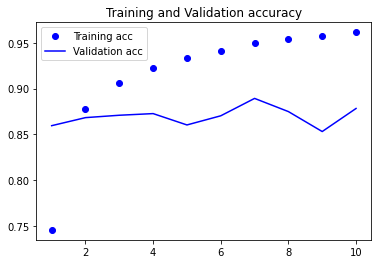

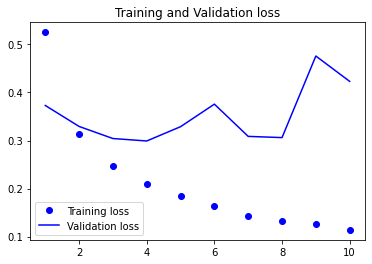

<Figure size 432x288 with 0 Axes>

In [14]:
# 정확성 확인 
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss =history.history['val_loss']

epochs = range(1, len(acc)+1)

# accuracy 그래프 
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

# loss 그래프 
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.figure()
plt.show()

In [13]:
# 모델 평가하기
model.evaluate(x_test, y_test)

782/782 [==============================] - 53s 68ms/step - loss: 0.5229 - acc: 0.8482


[0.5229334235191345, 0.8481600284576416]

- 정확성: 84%
  - 단방향 LTSM보다 약간 향상됨 